In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL
from scipy.stats import norm

d = 7
h = [39.4, 41.6, 43.8, 48] #43.8
angolo = list(map(lambda x: np.arctan(d/x), h))
errangolo = [0.0070915, 0.00774469, 0.00813600, 0.0085678267]
#errangolo = list(map(lambda x: x/100, angolo))
lunghezza = list(map(lambda x: np.sqrt(x**2+d**2)*35.858*2/1000, h)) #equivalente

#print(angolo, lunghezza)

ch = []
errch=[]

for l in range(len(h)):
    raw_data = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\strato_morto\strato_morto_" + str(h[l])+"mm.dat")
    
    data1 = []
    
    for i in range(len(raw_data)):
        for j in range(int(raw_data[i])):
            data1.append(i)
            
    data = np.array(data1)
    
    signal = []
    
    #print(data[100:120])
    for i in range(len(data)):
        if data[i] > 4400 and data[i] < 5200 : signal.append(data[i])
            
    #print(raw_data[np.argmax(raw_data)], data[np.argmax(data)], max(signal), max(raw_data))

    #plt.hist(signal)
    #plt.show()
    
    N=sum(raw_data)
    
    def model(x, N, mu, sigma):
    	return N*norm.cdf(x, loc = mu, scale = sigma)
    N_ext = 0
    for i in range(4750, 4850): #picco1 (più a dx)
        N_ext = N_ext + raw_data[i]
    
    
    numbins=[]
    chi2=[]

    for nbins in range(8, 30):
       
        bin_content, bin_edges = np.histogram(signal, bins = nbins)
    
        costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
        my_minuit = Minuit(costf, N = N_ext,  mu = 4800, sigma = 20)
        my_minuit.migrad()
        
        # print(my_minuit.valid)
        if ((my_minuit.valid == True) and (my_minuit.fval/my_minuit.ndof > 0.1 )):
            chi2.append(my_minuit.fval/my_minuit.ndof)
            numbins.append(nbins)
    
    
    #print(numbins[np.array(chi2).argmin()])

    index = np.array(chi2).argmin() #dove c'è il fit migliore
    nbins = numbins[index]
    #print(nbins)
    bin_content, bin_edges = np.histogram(signal, bins = nbins)
    
    N_events = sum(bin_content)
    
    costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
    my_minuit = Minuit(costf, N = N_ext,  mu = 4800, sigma = 20)
    
    my_minuit.migrad()
    display(my_minuit)
    ch.append(my_minuit.values["mu"])
    errch.append(my_minuit.errors["mu"])
    print(ch[l])
    #display(my_minuit)

print(lunghezza)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 198.2 (χ²/ndof = 7.6)      │              Nfcn = 114              │
│ EDM = 5.69e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │    209    │    14     │            │            │         │         │       │
│ 1 │ mu    │  4.781e3  │  0.009e3  │            │            │         │         │       │
│ 2 │ sigma │    128    │     7     │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │     N    mu sigma │
├───────┼───────────────────┤
│     N │   210     0     0 │
│    mu │     0  82.8     0 │
│ sigma │     0     0  48.9 │
└───────┴───────────────────┘

4781.046455500528


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1171 (χ²/ndof = 45.1)      │              Nfcn = 140              │
│ EDM = 8.96e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │  1.51e3   │  0.04e3   │            │            │         │         │       │
│ 1 │ mu    │ 4.7826e3  │ 0.0035e3  │            │            │         │         │       │
│ 2 │ sigma │   132.9   │    2.6    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │        N       mu    sigma │
├───────┼────────────────────────────┤
│     N │ 1.51e+03       -1        2 │
│    mu │       -1     12.2       -0 │
│ sigma │        2       -0     6.88 │
└───────┴────────────────────────────┘

4782.631510671115


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1094 (χ²/ndof = 42.1)      │              Nfcn = 158              │
│ EDM = 7.02e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │  1.75e3   │  0.04e3   │            │            │         │         │       │
│ 1 │ mu    │ 4.8025e3  │ 0.0033e3  │            │            │         │         │       │
│ 2 │ sigma │   135.5   │    2.5    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │        N       mu    sigma │
├───────┼────────────────────────────┤
│     N │ 1.75e+03        0        3 │
│    mu │        0       11        0 │
│ sigma │        3        0     6.32 │
└───────┴────────────────────────────┘

4802.519458444356


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1032 (χ²/ndof = 39.7)      │              Nfcn = 198              │
│ EDM = 7.85e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N     │  1.54e3   │  0.04e3   │            │            │         │         │       │
│ 1 │ mu    │ 4.7824e3  │ 0.0033e3  │            │            │         │         │       │
│ 2 │ sigma │   127.6   │    2.4    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │        N       mu    sigma │
├───────┼────────────────────────────┤
│     N │ 1.54e+03       -0        2 │
│    mu │       -0     10.9       -0 │
│ sigma │        2       -0        6 │
└───────┴────────────────────────────┘

4782.355681320172
[2.8698589130359977, 3.025327368472933, 3.181022983192771, 3.4787804609615707]


[5.246051101050582, 5.247794661738228, 5.269671404288792, 5.24749124945219] [0.21236955956466383, 0.22387422526699705, 0.2353957007562651, 0.2574297541111562]


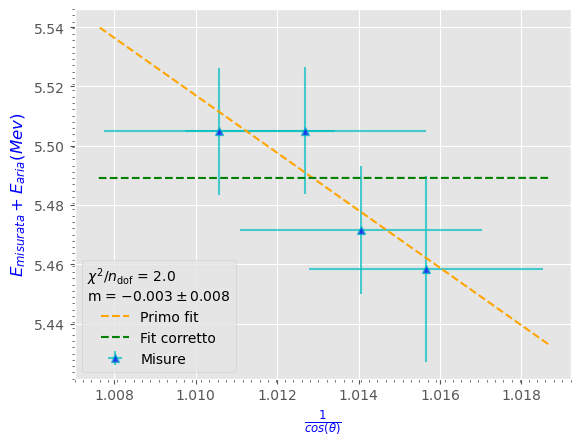

Spessore strato morto: 220.2274674346738 +- 546.9585542773156 A


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm
import matplotlib.ticker as ticker


#curva calibrazione 900mm2
a = 0.11e-2
erra = 14e-7
b = -1.31e-2
errb = 7e-3

pf = 0.74 #Mev/cm

En = list(map(lambda x: x*a + b, ch))
E_aria = list(map(lambda x: pf*x/10, lunghezza))
errpf = 1e-3

errEn = []
errEaria=[]
y = []
x=[]

for i in range(len(ch)):
            errEn.append(En[i] * np.sqrt((errch[i]/ch[i])**2+(erra/a)**2))
            errEaria.append(np.sqrt(2*(errpf/pf)**2))
            y.append(En[i]+E_aria[i])
            x.append(1/np.cos(angolo[i]))

print(En, E_aria)

errx = []
erry = []
err=[]

for i in range(len(x)):
    errx.append(1.5*np.sin(angolo[i])/np.cos(angolo[i])**2*errangolo[i])
    erry.append(1.5*(errEn[i] + errEaria[i]))

for i in range(len(x)):
    err.append(np.sqrt(errx[i]**2+erry[i]**2))

func = lambda x, m: m*x + 5.486
func2 = lambda x, m, q: m*x+q

least_squares = LeastSquares (x, y, err, func)
least_squares2 = LeastSquares (x, y, err, func2)


my_minuit = Minuit (least_squares, m=0) 
my_minuit.migrad ()  
my_minuit.hesse ()

my_minuit2 = Minuit (least_squares2, m=0, q=0) 
my_minuit2.migrad ()  
my_minuit2.hesse ()
#display(my_minuit)

x2 = np.linspace(x[0]+0.003, x[-1]-0.003, 100)

fig, ax = plt.subplots()

plt.errorbar(x, y, xerr= list(map(lambda x: x*1.5, errx)), yerr= list(map(lambda x: x*1.5, erry)), linestyle="None", marker="^", color="k", mec="c", mfc="b", ecolor="c", label="Misure", alpha=.7)
plt.plot(x2, func2(x2, my_minuit2.values[0], my_minuit2.values[1]), linestyle="--", color="orange", label="Primo fit")
plt.plot(x2, func(x2, my_minuit.values[0]), linestyle="--", color="g", label="Fit corretto")

plt.grid("on")
plt.xlabel(r"$\frac{1}{cos(\theta)}$", color="b")
plt.ylabel(r"$E_{misurata} + E_{aria} (Mev) $", color="b", rotation=90)

fit_info = [
    f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minuit.fmin.reduced_chi2:.1f}",
]
for p, v, e in zip(my_minuit.parameters, my_minuit.values, my_minuit.errors):
    fit_info.append(f"{p} = ${-v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info), frameon=True, loc = "lower left")

plt.style.use("ggplot")

#plt.xlim(10, 80)
# For the x-axis
ax.xaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.xaxis.set_major_locator(ticker.LinearLocator(8))
# For the y-axis
ax.yaxis.set_minor_locator(ticker.LinearLocator(60))
#ax.yaxis.set_major_locator(ticker.LinearLocator(8))

plt.show()

E_strato = my_minuit.values["m"]
pf2 = 140 #kev/um

d = -E_strato/pf2 *10**3*10**-6*10**10

print(f"Spessore strato morto: {-d} +- {my_minuit.errors["m"]/pf2*10**3*10**-6*10**10} A")